In [1]:
# Isolation Forest method is based on the idea that anomalies are easier to isolate than normal data points.

In [2]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np
import warnings; warnings.filterwarnings('ignore')
# suppress warnings

In [3]:
filepath="C:\\Users\\madhu\\OneDrive\\Desktop\\DMPA_CCEB_38_57_62\\cleaned_data_2.csv"
df=pd.read_csv(filepath)
df.head()

,Product_ID,Plant_Code,Ship_ahead_day_count,Destination_Port,Carrier,Unit_quantity,Weight
0,1700106,PLANT16,3,PORT09,V44_3,808,14.30
1,1700106,PLANT16,3,PORT09,V44_3,3188,87.94
2,1700106,PLANT16,3,PORT09,V44_3,2331,61.20
3,1700106,PLANT16,3,PORT09,V44_3,847,16.16
4,1700106,PLANT16,3,PORT09,V44_3,2163,52.34


In [4]:
check_cols=['Ship_ahead_day_count', 'Unit_quantity', 'Weight']
x_train=df[check_cols]
x_train.head()

,Ship_ahead_day_count,Unit_quantity,Weight
0,3,808,14.30
1,3,3188,87.94
2,3,2331,61.20
3,3,847,16.16
4,3,2163,52.34


In [5]:
x_train=x_train.apply(pd.to_numeric,errors='coerce')
x_train=x_train.dropna()
clf=IsolationForest(n_jobs=100,random_state=42,contamination=0.05)
clf.fit(x_train)
y_pred_train=clf.predict(x_train)
y_pred_train

array([1, 1, 1, ..., 1, 1, 1])

In [6]:
pd.value_counts(y_pred_train)

 1    8754
-1     461
Name: count, dtype: int64

In [7]:
x_train.loc[y_pred_train==-1,:]

,Ship_ahead_day_count,Unit_quantity,Weight
21,3,2063,265.100000
22,3,2114,267.100000
23,3,2108,271.100000
77,3,2716,457.160000
78,3,1498,245.080000
...,...,...,...
8998,5,1237,67.479788
9000,5,2277,146.959575
9003,5,1800,106.719681
9011,5,1211,69.787645


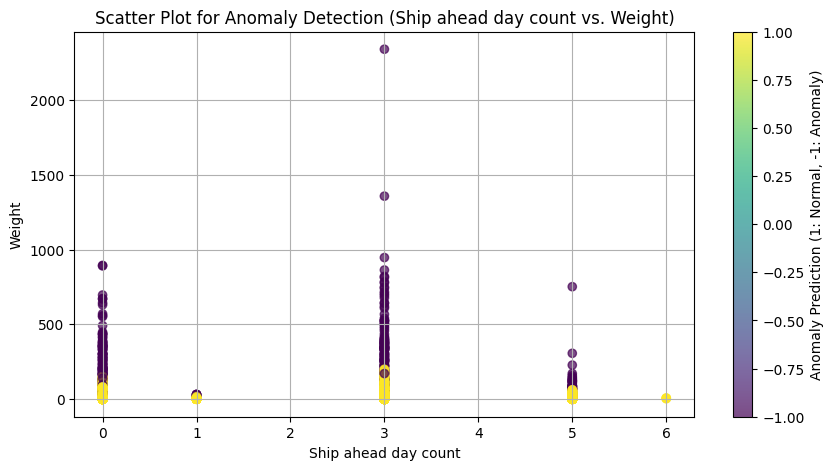

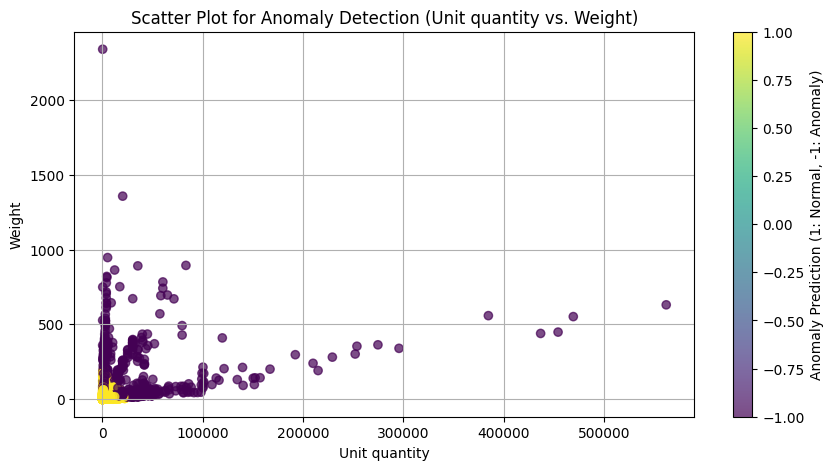

In [8]:
import matplotlib.pyplot as plt

# Create a scatter plot for 'Ship ahead day count'
plt.figure(figsize=(10, 5))
plt.scatter(x_train['Ship_ahead_day_count'], x_train['Weight'], c=y_pred_train, cmap='viridis', alpha=0.7)
plt.title("Scatter Plot for Anomaly Detection (Ship ahead day count vs. Weight)")
plt.xlabel("Ship ahead day count")
plt.ylabel("Weight")
plt.colorbar(label='Anomaly Prediction (1: Normal, -1: Anomaly)')
plt.grid()
plt.show()

# Create a scatter plot for 'Unit quantity'
plt.figure(figsize=(10, 5))
plt.scatter(x_train['Unit_quantity'], x_train['Weight'], c=y_pred_train, cmap='viridis', alpha=0.7)
plt.title("Scatter Plot for Anomaly Detection (Unit quantity vs. Weight)")
plt.xlabel("Unit quantity")
plt.ylabel("Weight")
plt.colorbar(label='Anomaly Prediction (1: Normal, -1: Anomaly)')
plt.grid()
plt.show()


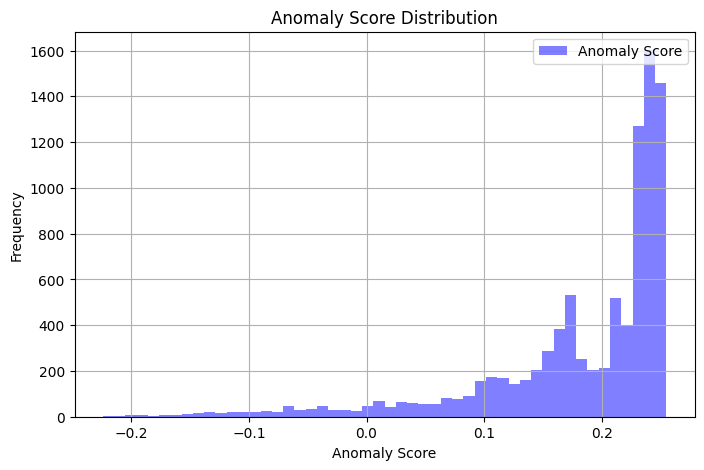

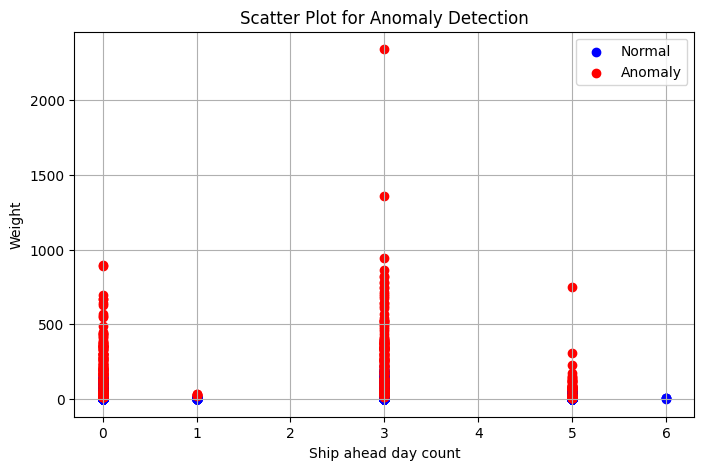

In [9]:
# Plot the anomaly scores
plt.figure(figsize=(8, 5))
plt.hist(clf.decision_function(x_train), bins=50, alpha=0.5, color='blue', label='Anomaly Score')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Anomaly Score Distribution')
plt.legend(loc='upper right')
plt.grid()
plt.show()

import matplotlib.pyplot as plt

# Create a scatter plot of 'Ship ahead day count' vs. 'Weight'
plt.figure(figsize=(8, 5))

# Plot normal data points (in blue)
plt.scatter(x_train[y_pred_train == 1]['Ship_ahead_day_count'], x_train[y_pred_train == 1]['Weight'], color='blue', label='Normal')

# Plot anomalies (in red)
plt.scatter(x_train[y_pred_train == -1]['Ship_ahead_day_count'], x_train[y_pred_train == -1]['Weight'], color='red', label='Anomaly')

plt.title('Scatter Plot for Anomaly Detection')
plt.xlabel('Ship ahead day count')
plt.ylabel('Weight')
plt.legend()
plt.grid()
plt.show()


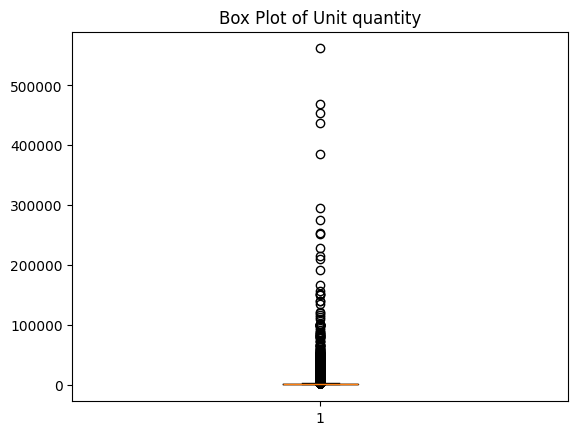

In [10]:
plt.boxplot(x_train['Unit_quantity'])
plt.title("Box Plot of Unit quantity")
plt.show()

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
# Evaluate the model
conf_matrix = confusion_matrix(np.ones(len(x_train)), y_pred_train)
classification_rep = classification_report(np.ones(len(x_train)), y_pred_train, target_names=['Normal', 'Anomaly'])

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[   0    0]
 [ 461 8754]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00         0
     Anomaly       1.00      0.95      0.97      9215

    accuracy                           0.95      9215
   macro avg       0.50      0.47      0.49      9215
weighted avg       1.00      0.95      0.97      9215



In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
# Evaluate precision, recall, and F1 score (if you have true labels for anomalies)
true_labels = np.where(y_pred_train == -1, 1, 0) 
predicted_labels = np.where(y_pred_train == -1, 1, 0)

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Precision, Recall, F1 Score
precision = precision_score(true_labels, predicted_labels, zero_division=1)  # Handle zero division
recall = recall_score(true_labels, predicted_labels, zero_division=1)  # Handle zero division
f1 = f1_score(true_labels, predicted_labels, zero_division=1)  # Handle zero division
accuracy = accuracy_score(true_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Confusion Matrix:
[[8754    0]
 [   0  461]]
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Accuracy: 1.00
